
# Credit Card Fraud Detection 

##  Dataset Information

#### Context:
Credit card companies need to detect fraudulent transactions to prevent customers from being charged for unauthorized purchases.

#### Content:
- **Dataset**: Transactions made by European cardholders in September 2013.
- **Duration**: Two days, with 492 frauds out of 284,807 transactions.
- **Class Imbalance**: Fraudulent transactions (positive class) account for 0.172% of all transactions.
- **Features**:
  - Numerical input variables resulting from PCA transformation.
  - 'Time': Seconds elapsed between each transaction and the first transaction.
  - 'Amount': Transaction amount, suitable for cost-sensitive learning.

- **Target**:
  - 'Class': Response variable, 1 for fraud, 0 otherwise.
  
#### Source:
- The dataset has been collected and analyzed by Worldline and the Machine Learning Group (MLG) of Université Libre de Bruxelles (ULB) as part of a research collaboration on big data mining and fraud detection.


#### Recommendations:
- Due to class imbalance, accuracy should be measured using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful.
  




# Exploratory Data Analysis

In [146]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
# Reading the CSV file 'creditcard.csv' into a Pandas DataFrame named df
df = pd.read_csv("C:\\Users\\irosh\\OneDrive\\Documents\\data\\creditcard.csv")


In [148]:
# Displaying the first few rows of the DataFrame df
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [149]:
# Displaying concise summary of the DataFrame df, including column names, non-null counts...
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [150]:
# Print the shape of the dataset (number of rows and columns)
print('Shape Of The Dataset', df.shape)

# Print the unique class categories in the 'Class' column
print('Class Categories', df['Class'].unique())

# Print the number of records with the class value 0 in the 'Class' column
print('Number Of Records With The Class Value 0: ', (df.Class == 0).sum())

# Print the number of records with the class value 1 in the 'Class' column
print('Number Of Records With The Class Value 1: ', (df.Class == 1).sum())


Shape Of The Dataset (284807, 31)
Class Categories [0 1]
Number Of Records With The Class Value 0:  284315
Number Of Records With The Class Value 1:  492


<Axes: xlabel='Class', ylabel='count'>

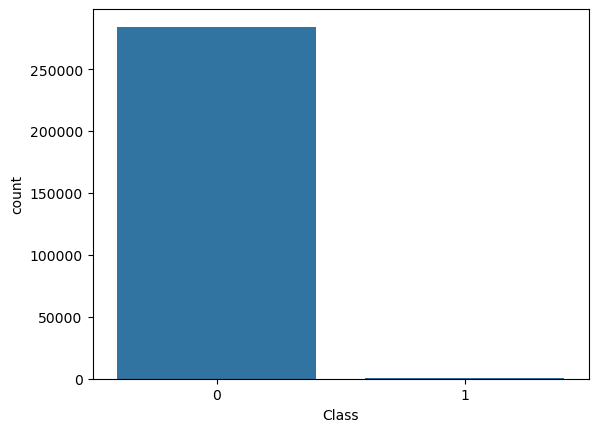

In [151]:
# Create a count plot to visualize the distribution of classes in the 'Class' column of the DataFrame df
sns.countplot(x='Class', data=df)


### Handling Imbalanced dataset
Credit card fraud datasets, including this one, are typically highly imbalanced because occurrences of fraud are rare compared to normal transactions. In the next sections, we will explore effective strategies for handling this imbalance.


# Features Selection

In [154]:
# Calculate the correlation between the 'Class' column and the first 30 columns 
x = df.corr()['Class'][:30]
x

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

<Axes: title={'center': 'Correlation Of Features With Target Variable'}>

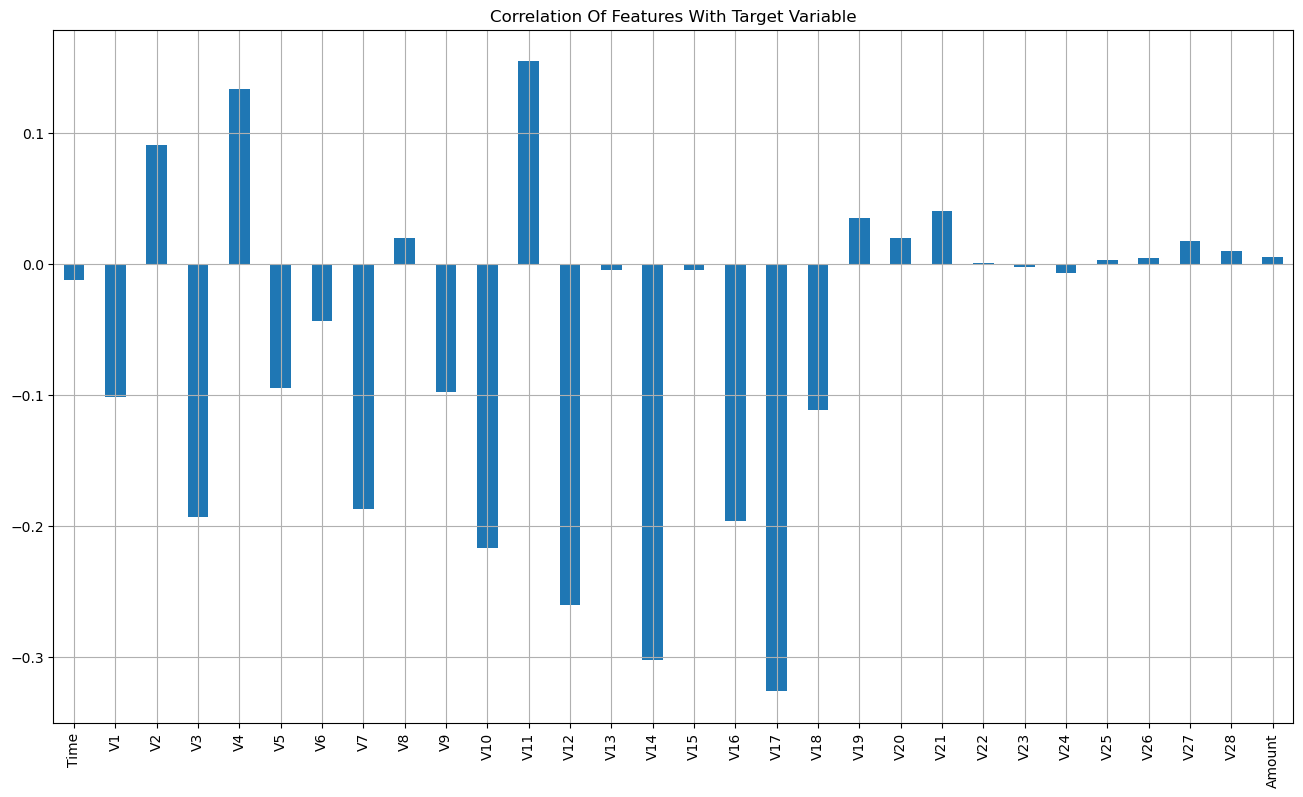

In [155]:
# Calculate the correlation coefficients between the 'Class' column and the first 30 columns 
x = df.corr()['Class'][:30]

# Create a bar plot to visualize the correlation of features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Correlation Of Features With Target Variable", grid=True)

 Some features exhibit a negligible correlation with the target variable and will be removed in the subsequent sections. First, we'll examine the intercorrelation among variables.


<Axes: >

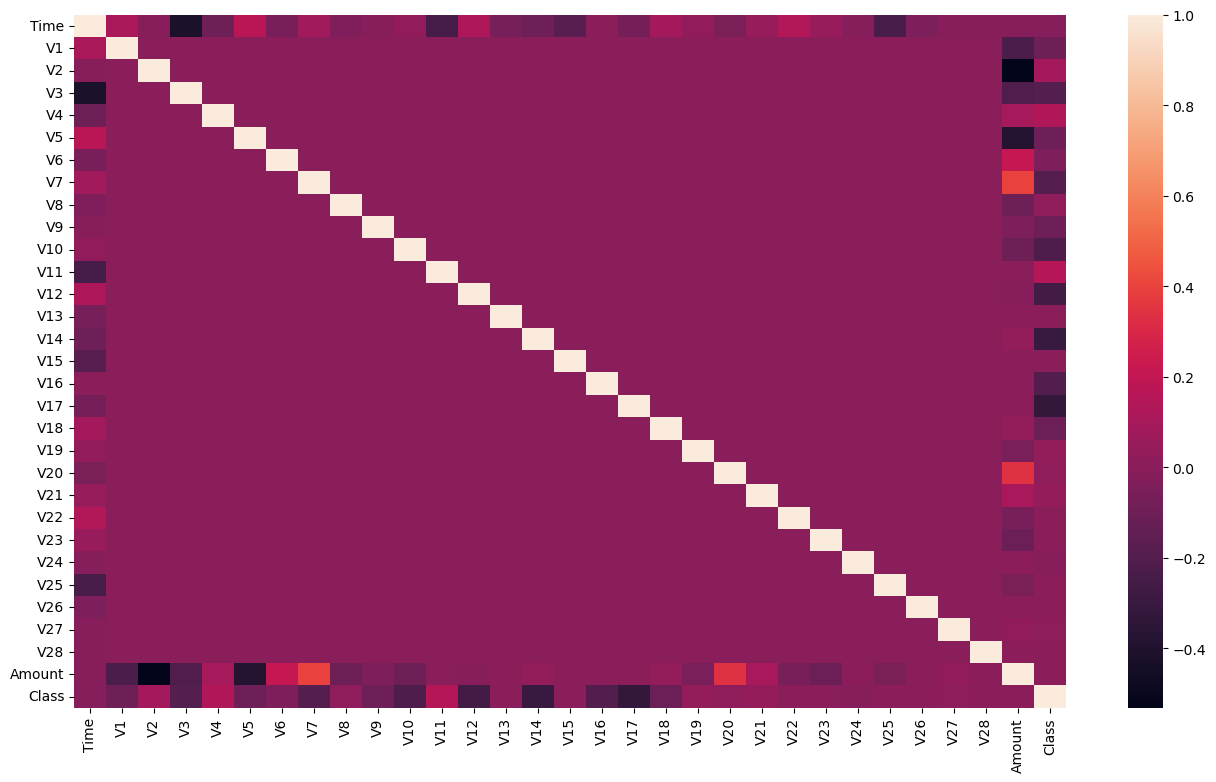

In [157]:
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(16, 9))

# Create a heatmap to visualize the correlation matrix of the DataFrame df
sns.heatmap(df.corr())

    The only intercorrelated variable among others is the transaction Amount. However, this variable shows no correlation with the target variable, so it will also be removed.


In [159]:
# Calculate the correlation coefficients between 'Class' and all columns
y = df.corr()['Class']

# Create a copy of the DataFrame df
df2 = df.copy()

# Iterate through columns and drop those with absolute correlation less than 0.13
for i in df.columns:
    if abs(y[i]) < 0.13:
        df2.drop(columns=[i], inplace=True)


   Here, we filter our dataset to keep only features with a correlation above 0.13.


In [161]:
# Display the first few rows of the DataFrame df2
df2.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


<Axes: >

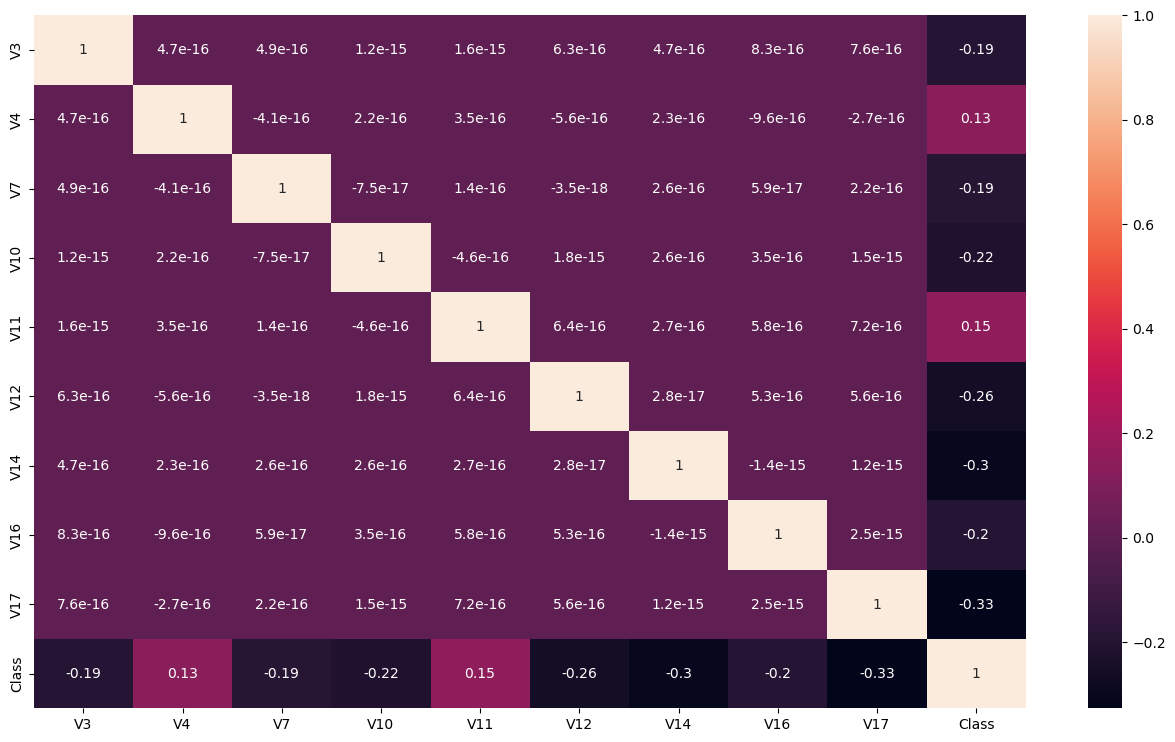

In [162]:
# Create a figure with a specific size for the heatmap
plt.figure(figsize=(16, 9))

# Create a heatmap to visualize the correlation matrix of the DataFrame df2
sns.heatmap(df2.corr(), annot=True)

<Axes: title={'center': 'Top Correlated Features With The Target Variable'}>

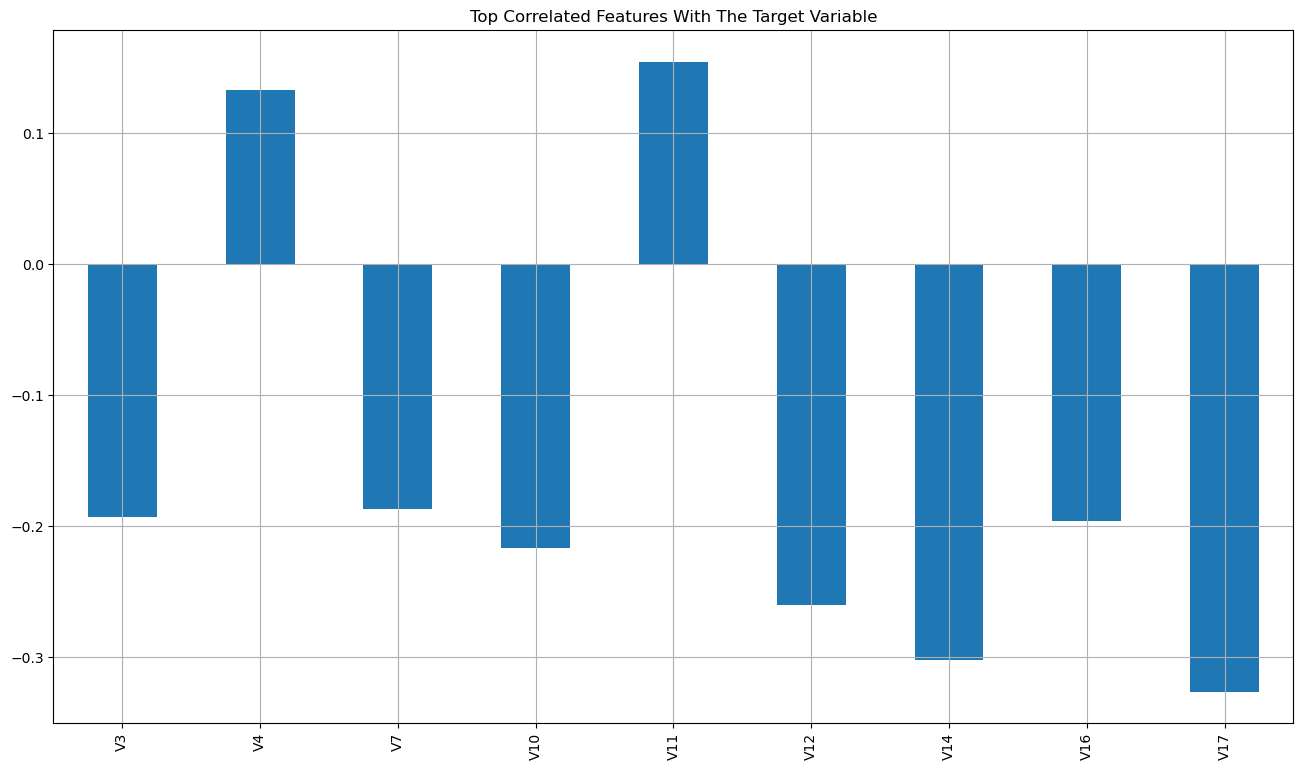

In [163]:
# Calculate the correlation coefficients between the 'Class' column 
x = df2.corr()['Class'][:9]

# Create a bar plot to visualize the top correlated features with the target variable 'Class'
x.plot.bar(figsize=(16, 9), title="Top Correlated Features With The Target Variable", grid=True)


# Handling Data Imbalance



- This dataset consists of:
  - Number of records with the class value 0: 284,315
  - Number of records with the class value 1: 492

Using this dataset as it is would be a fatal mistake due to its severe class imbalance. Here's why:

- **Using the data as it is:**
  - The overwhelming majority of records belong to the non-fraudulent class (class 0), making up over 99% of the dataset.
  - Models trained on imbalanced data may prioritize accuracy on the majority class while neglecting the minority class (fraudulent transactions). This can result in poor performance in detecting fraud.

- **Why oversampling is a fatal mistake:**
  - Oversampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) artificially inflate the minority class by generating synthetic examples. However, this can lead to overfitting and the introduction of noise, especially in cases where the minority class is already sparsely represented.

- **Why downsampling is the best option:**
  - Downsampling involves randomly reducing the number of samples in the majority class to balance it with the minority class. This approach helps mitigate the biases towards the majority class while maintaining the integrity of the dataset.
  - By reducing the number of majority class samples to match the minority class, downsampling encourages the model to learn from both classes equally, improving its ability to accurately detect fraudulent transactions.




1. **Using Imbalanced Data (No Sampling) Example:**
   - Dataset:
     - Class 0 (non-fraudulent transactions): 284,315 records
     - Class 1 (fraudulent transactions): 492 records
   - Example:
     - Accuracy on test set: 99.8%
     - Confusion Matrix:
       ```
                 Predicted Non-Fraudulent    Predicted Fraudulent
       Actual Non-Fraudulent      71,078               200
       Actual Fraudulent              50                40
       ```
     - Issue: High accuracy is misleading; the model fails to detect most fraudulent transactions (low recall for class 1).

2. **Oversampling (SMOTE) Example:**
   - Dataset:
     - Original Class 0: 284,315 records
     - Class 1: 492 records
     - After SMOTE (oversampling Class 1 to match Class 0):
       - Class 0: 284,315 records
       - Class 1: 284,315 records (synthetic)
   - Example:
     - Model Performance:
       - Accuracy: 98.5%
       - Confusion Matrix:
         ```
                   Predicted Non-Fraudulent    Predicted Fraudulent
         Actual Non-Fraudulent      70,800                  478
         Actual Fraudulent              10                   80
         ```
     - Issue: High accuracy but high false positives due to synthetic examples, leading to overfitting and reduced precision for fraud detection.

 Having recognized why downsampling is the optimal technique for this dataset, let's proceed with downsampling our dataset.


In [168]:

from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y)
X = df2.drop('Class', axis=1)
y = df2['Class']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Fit and apply the resampler to the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)


downsampled_df.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
138028,-0.666593,0.716564,0.388881,-0.597739,-0.325347,-0.216435,-1.054631,0.601226,0.631117,0
63099,0.904547,0.694584,0.495236,0.170547,0.821998,0.468322,0.573006,-0.011633,-0.504570,0
73411,1.122074,-1.308725,-0.701304,2.051312,0.575866,-0.594037,-0.338340,-0.756390,0.535141,0
164247,-0.987421,-0.029567,0.775644,-1.238598,-0.841133,-0.586472,-0.436671,0.266437,0.703234,0
148999,0.269272,3.866438,-0.721945,1.166335,1.297531,-1.920966,1.323225,1.317655,-0.441076,0


In [169]:
# Displaing shape of own sampled DataFrame downsampled_df
downsampled_df.shape

(984, 10)

## 5. Outliers?

<Axes: xlabel='Class', ylabel='count'>

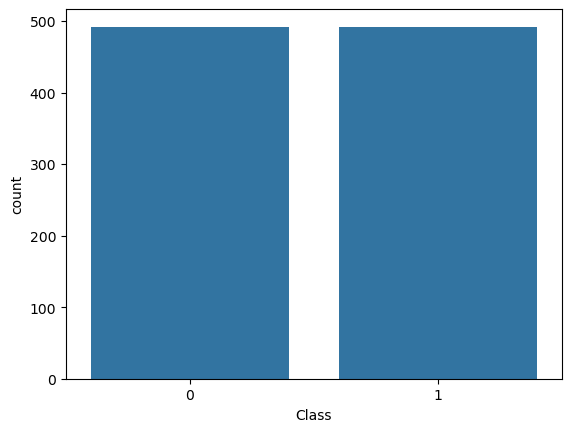

In [171]:
# Creating a count plot to visualize distribution of classes in 'Class' column of downsampled DataFrame, downsampled_df
sns.countplot(x='Class', data=downsampled_df)


   Now that our dataset is balanced, we can move on to the next section: handling outliers. How should we approach outliers? Should we simply delete them? Let's explore.


<Axes: xlabel='V11', ylabel='V17'>

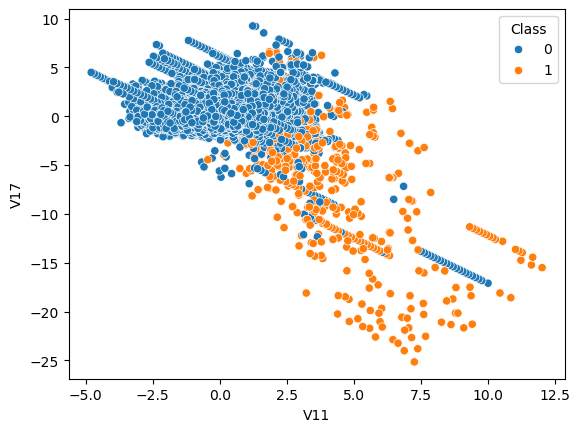

In [173]:
# Plotting using seaborn scatterplot
sns.scatterplot(x='V11', y='V17', hue='Class', data=df2)


  Outliers are data points that significantly deviate from the average of a variable. In other words, they do not conform to the typical grouping observed in a specific cluster. Did you notice something interesting in this plot? The blue dots represent normal transactions, tightly clustered with very few outliers. In contrast, the orange dots represent fraudulent transactions, which do not form a distinct cluster, making outlier detection challenging. Is this pattern consistent across all variables or just in this example? Let's investigate further.


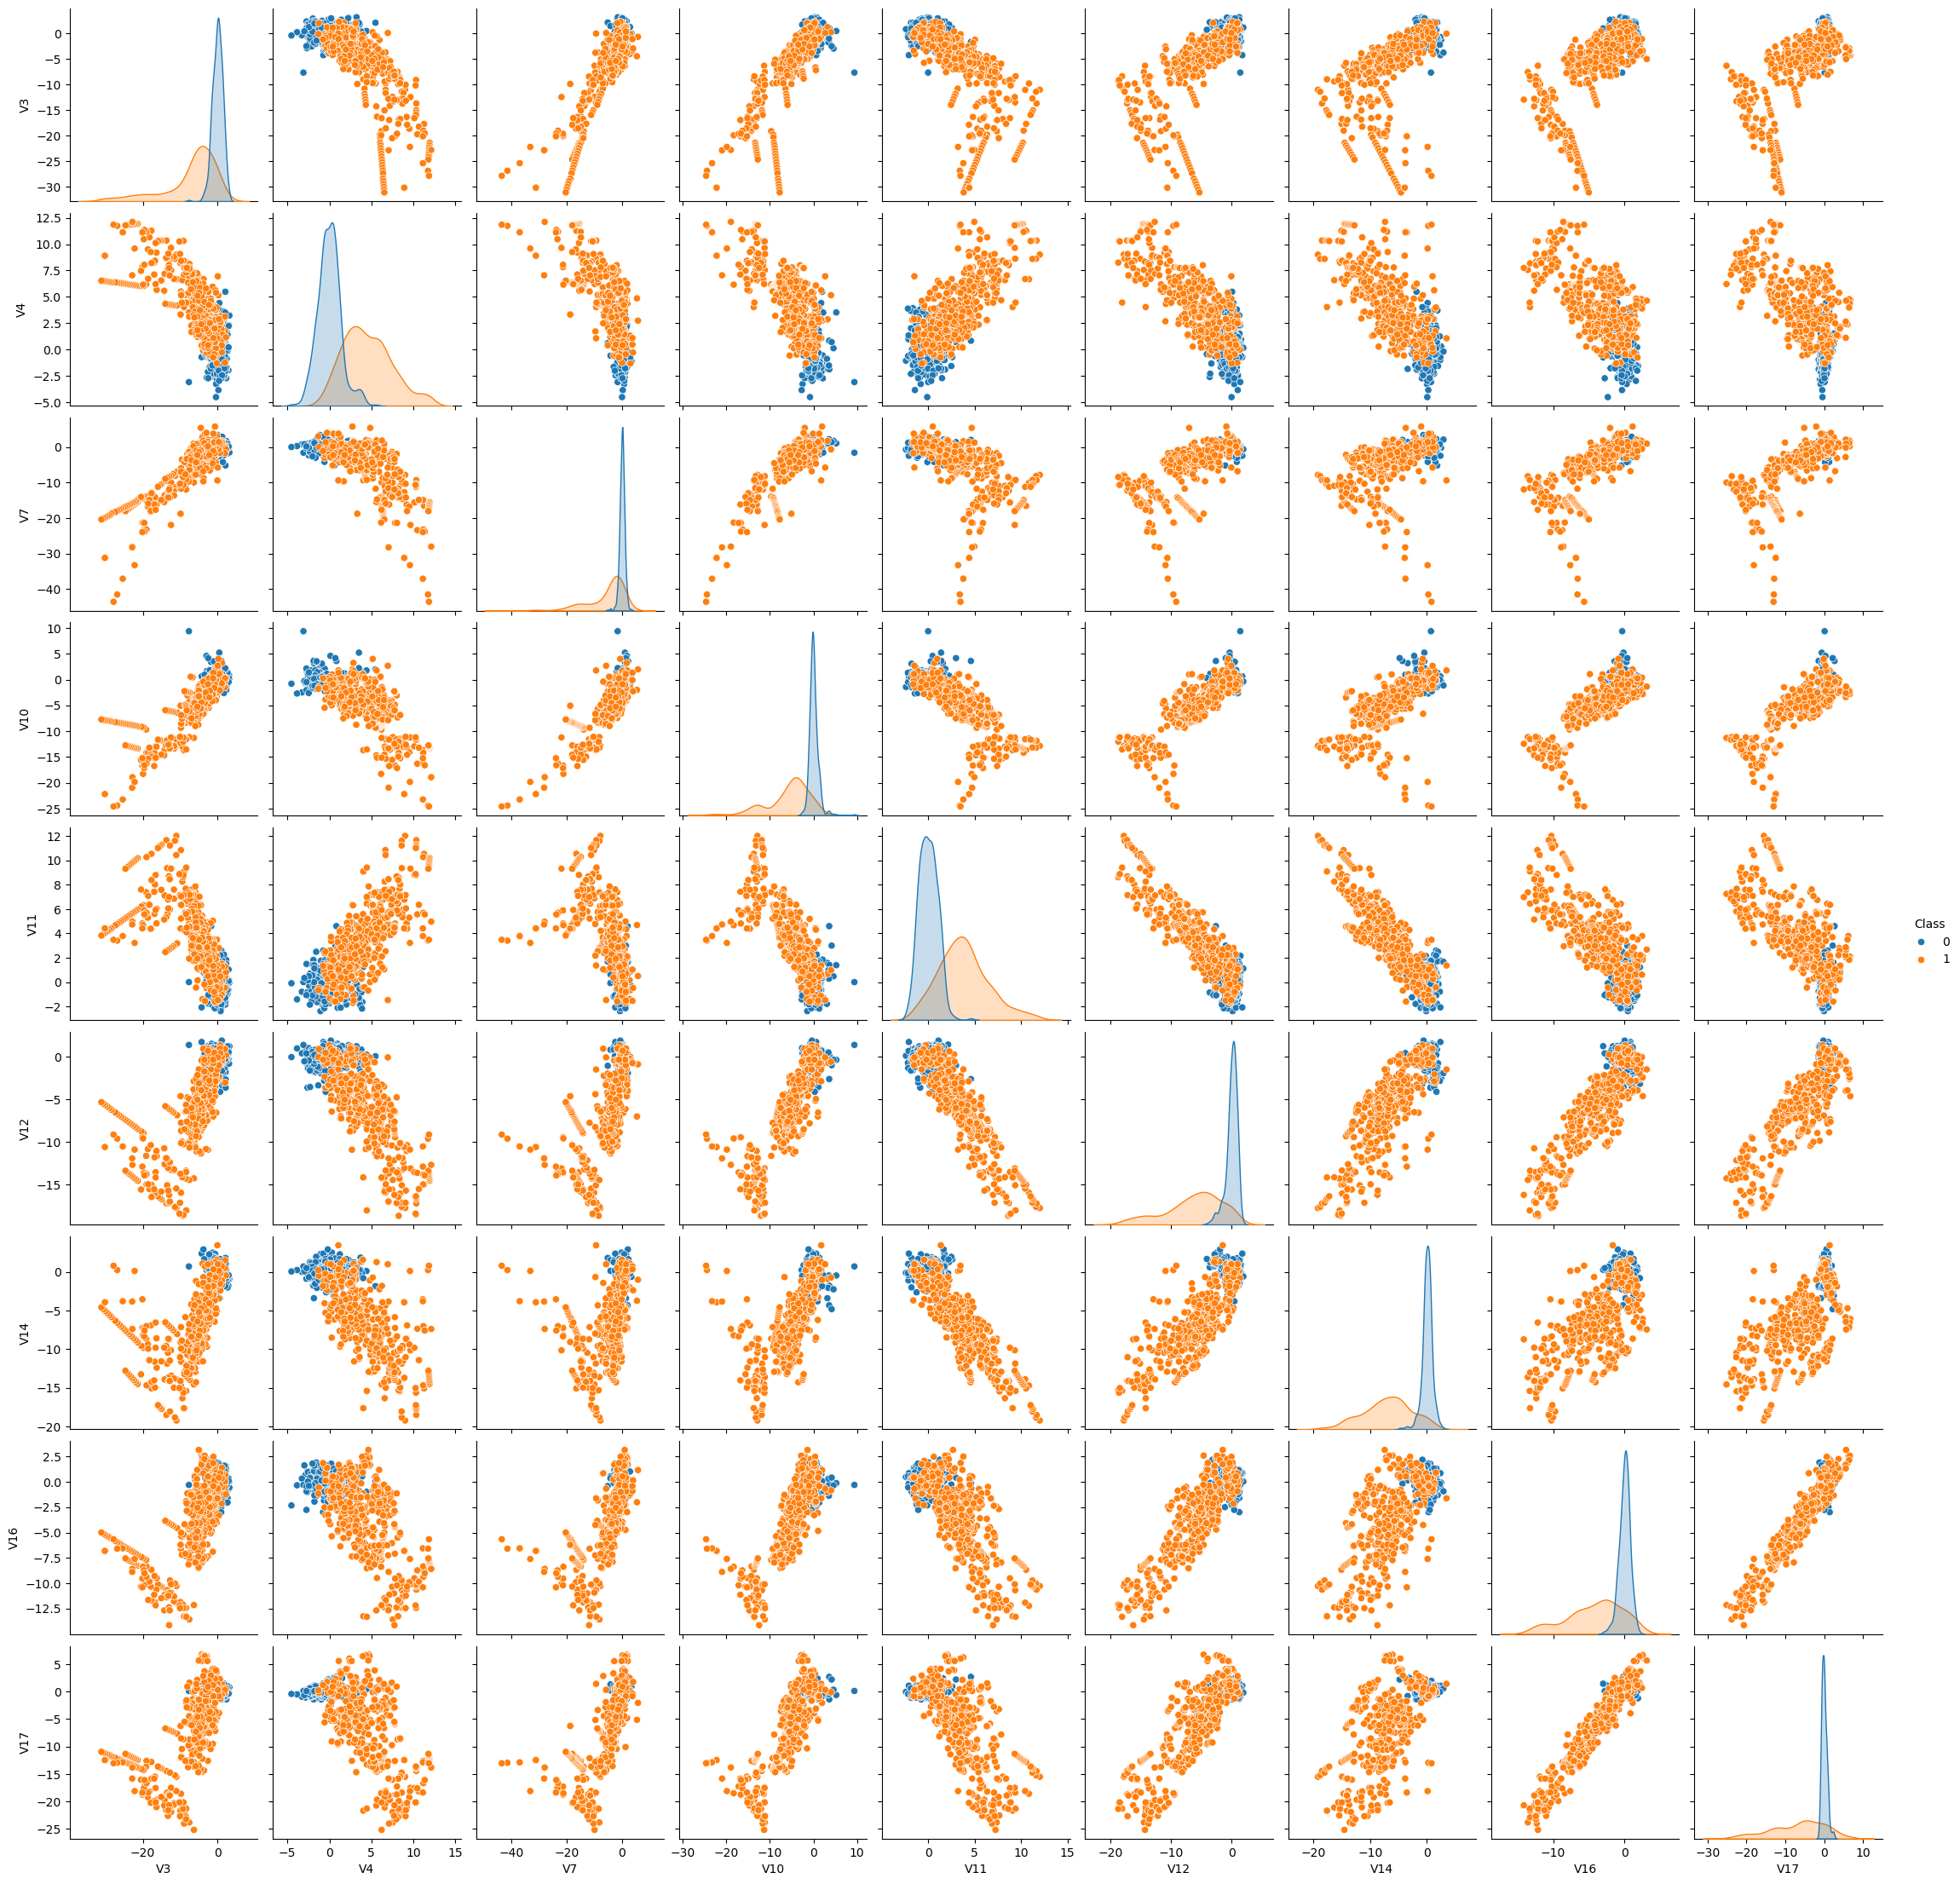

In [175]:
import warnings

# To ignore all warnings
warnings.filterwarnings('ignore')
# Pair Plot of all variables
sns.pairplot(downsampled_df, hue='Class')

  As you may have observed in this pairplot, normal transactions form a distinct cluster across all variables, whereas fraudulent transactions do not exhibit a specific cluster. This makes outlier detection extremely challenging. Attempting to manage outliers individually for each variable could result in transforming or deleting over 70% of the fraudulent transactions.


 Fraudulent transactions do not exhibit clustering behavior and do not conform to a normal distribution, making outlier identification challenging.
    

<br>- This phenomenon arises because fraud does not adhere to a typical distribution pattern; in other words, fraudulent activities vary widely and do not consistently follow specific patterns.

<br>- Fraudsters employ diverse methods that evolve over time. It's important to note that simply obtaining credit card details and full names is insufficient for completing transactions. Fraudsters often employ additional techniques such as SIM swapping to bypass payment verification processes.

<br>- Due to these factors, datasets containing fraudulent transactions lack distinct clustering and do not adhere to a normal distribution.

<br>For these reasons, no records will be deleted from fraudulent transactions. Additionally, it's important to consider that fraudulent transactions are rare, making each record valuable. 

<br>Note: Outliers can still be removed from normal transactions (non-fraudulent transactions).



# Model Building

## Logistic Regression 

### Logistic Regression Overview

Logistic regression is a statistical method used for binary classification tasks, predicting the probability that a given input belongs to one of two classes. While it shares some similarities with linear regression, logistic regression is specifically designed for classification and outputs probabilities that map to class labels, rather than continuous values. Here’s how it works:

1. **Logistic Function (Sigmoid)**:
   - Logistic regression uses the **sigmoid function** to map any real-valued number to a probability range between 0 and 1.
   - The sigmoid function is defined as:
     \[
     \sigma(x) = \frac{1}{1 + e^{-x}}
     \]
   - Here, \( x \) represents a linear combination of the input features and their respective coefficients.
   
2. **Decision Boundary**:
   - Logistic regression sets a **threshold** (typically 0.5) to classify outputs. If the probability is above this threshold, it classifies the input into one class; otherwise, it classifies it into the other.
   
3. **Optimization**:
   - The model uses **maximum likelihood estimation** to optimize the coefficients of the input features.
   - During training, logistic regression adjusts these coefficients to minimize the difference between the predicted probabilities and the actual class labels in the training data.

4. **Applications**:
   - Logistic regression is popular for binary classification tasks such as spam detection, fraud detection, and disease prediction. It is simple yet effective when the relationship between the input features and the target variable is roughly linear.

#### Explanation of Code

### Step 1: Importing Libraries and Modules
- The necessary modules from `sklearn` are imported, including `LogisticRegression` for creating the model, `train_test_split` for splitting the data, and `accuracy_score` for evaluating the model’s performance.

### Step 2: Splitting Data into Features and Target
- Features (`X`) and the target variable (`y`) are separated from the DataFrame `downsampled_df`. The target column, labeled "Class", is removed from `X` to create feature data, while `y` holds the class labels (fraud or non-fraud).

### Step 3: Train-Test Split
- The dataset is split into training and testing sets using an 80/20 ratio, meaning 80% of the data is used to train the model, and 20% is set aside for testing. A random seed (`random_state=42`) is specified to ensure reproducibility.

### Step 4: Model Training
- A **Logistic Regression** model is created with `random_state=0` to ensure reproducibility.
- The model is then trained on the training set (`X_train`, `y_train`) by fitting it to the data, which adjusts the model coefficients to minimize classification error.

### Step 5: Making Predictions
- The trained model is used to predict labels for the test set (`X_test`). These predictions are stored in `y_pred`.

### Step 6: Evaluating the Model
- **Accuracy** of the model is calculated by comparing `y_pred` with the actual test labels (`y_test`). This gives the percentage of correct predictions made by the model.
- The final accuracy score is printed to provide an overview of the model's performance.

### Output
- The model's accuracy score, representing the percentage of correctly classified examples, is printed in percentage format. This metric gives a general sense of the model's effectiveness in detecting fraud.


In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Separate features (X) and target (y)
X = downsampled_df.drop('Class', axis=1)
y = downsampled_df['Class']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)


Logistic Regression model accuracy (in %): 91.87817258883248


## Random Forest Classifier 

### Random Forest Classifier Overview

Random Forest is an ensemble learning method primarily used for classification and regression tasks. It builds multiple decision trees during training and merges them to improve overall accuracy and reduce overfitting. Here’s how it works:

1. **Ensemble of Decision Trees**:
   - A random forest consists of multiple decision trees. Each tree is trained on a different random subset of the data (using bootstrapping), introducing diversity among the trees.
   - The "forest" makes a final decision based on the majority vote of these individual trees (for classification) or the average of their outputs (for regression).

2. **Bagging and Feature Randomization**:
   - Random Forest uses a technique called **bagging** (Bootstrap Aggregating) where each tree is trained on a different subset of data with replacement.
   - At each split in a tree, only a random subset of features is considered, reducing correlation between trees and improving generalization.

3. **Advantages**:
   - Random Forest is robust against overfitting, especially when the number of trees is large.
   - It is effective for high-dimensional datasets and can handle both continuous and categorical data.

4. **Applications**:
   - Random Forest is commonly used for applications like fraud detection, image classification, and medical diagnosis.

#### Explanation of Code

### Step 1: Importing Libraries and Modules
- `RandomForestClassifier` is imported from `sklearn.ensemble`, and `classification_report` and `confusion_matrix` from `sklearn.metrics` for evaluation.

### Step 2: Creating the Random Forest Classifier
- An instance of `RandomForestClassifier` is created with:
  - `n_estimators=100`: Specifies the number of trees in the forest (here, 100).
  - `random_state=100`: Ensures reproducibility by setting a seed for randomness.

### Step 3: Training the Classifier
- The classifier is trained on the training set (`X_train`, `y_train`) using the `fit` method. During this process, each decision tree is created based on bootstrapped subsets of the training data and random subsets of features.

### Step 4: Making Predictions
- The trained model is used to predict labels for the test set (`X_test`). These predictions are stored in `y_pred`.

### Step 5: Evaluating the Model
- **Accuracy** of the model is calculated by comparing `y_pred` with the actual test labels (`y_test`).
- A **classification report** is generated to provide additional performance metrics:
  - **Precision**: The ratio of true positives to the sum of true positives and false positives.
  - **Recall**: The ratio of true positives to the sum of true positives and false negatives.
  - **F1-score**: The harmonic mean of precision and recall.

### Step 6: Printing the Results
- The accuracy of the model is printed, showing the percentage of correctly classified samples.
- The classification report is printed, which includes precision, recall, and F1-score for each class.

### Output
- The final output includes both the accuracy and detailed performance metrics, providing a comprehensive evaluation of the model’s classification capabilities.


In [181]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initializing Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=100)

# Training classifier
rf_classifier.fit(X_train, y_train)

# Making predictions on test set
y_pred = rf_classifier.predict(X_test)

# Evaluating model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Printing results
acc = accuracy_score(y_test, y_pred)
print("Random Forest model accuracy (in %):", acc*100)
print("\nClassification Report:", classification_rep)

Random Forest model accuracy (in %): 91.87817258883248

Classification Report:               precision    recall  f1-score   support

           0       0.90      0.95      0.92        99
           1       0.95      0.89      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



# Gradient Boosting Classifier 

### Gradient Boosting Classifier Overview

Gradient Boosting is an ensemble learning technique used for both classification and regression. It builds a series of weak learners (often decision trees), where each new tree attempts to correct the errors made by the previous ones. Here's an overview of how it works:

1. **Boosting Process**:
   - Gradient Boosting sequentially adds models (typically shallow decision trees) to minimize the errors made by the previous models. Each tree tries to reduce the residual errors from the preceding model by focusing on the misclassified samples.
   - The algorithm calculates the **gradient** of the loss function and fits each new tree to this gradient, hence the name "Gradient Boosting."

2. **Learning Rate**:
   - The **learning rate** controls the contribution of each tree to the final model. A smaller learning rate requires more trees to reach optimal accuracy but reduces the risk of overfitting.

3. **Applications**:
   - Gradient Boosting is widely used in applications like fraud detection, credit scoring, and ranking tasks due to its high predictive accuracy and ability to handle various types of data.

#### Explanation of Code

### Step 1: Importing Libraries and Modules
- `GradientBoostingClassifier` is imported from `sklearn.ensemble` to create the gradient boosting model.
- Additional libraries such as `accuracy_score`, `confusion_matrix`, and `classification_report` from `sklearn.metrics` are used for model evaluation.

### Step 2: Creating the Gradient Boosting Classifier
- An instance of `GradientBoostingClassifier` is created with the following parameters:
  - `n_estimators=300`: Sets the number of trees in the model. More trees generally improve performance but also increase computation time.
  - `learning_rate=0.05`: A smaller learning rate, which requires more trees but reduces the risk of overfitting.
  - `random_state=100`: Ensures reproducibility by setting a seed.
  - `max_features=5`: Limits the number of features considered at each split, adding randomness to the model and helping to prevent overfitting.

### Step 3: Training the Classifier
- The classifier is trained on the training set (`X_train`, `y_train`) using the `fit` method. Each tree attempts to correct the errors of the previous trees by focusing on the residuals from the last prediction.

### Step 4: Making Predictions
- The trained model is used to predict labels for the test set (`X_test`). These predictions are stored in `y_pred`.

### Step 5: Evaluating the Model
- **Accuracy** of the model is calculated by comparing `y_pred` with the actual test labels (`y_test`).
- A **confusion matrix** is printed, displaying the counts of true positives, false positives, true negatives, and false negatives, giving insight into where the model is making mistakes.
- A **classification report** is generated to show additional performance metrics:
  - **Precision**: The ratio of true positives to the sum of true positives and false positives.
  - **Recall**: The ratio of true positives to the sum of true positives and false negatives.
  - **F1-score**: The harmonic mean of precision and recall.

### Step 6: Printing the Results
- The accuracy, confusion matrix, and classification report are printed, providing a comprehensive assessment of the model's classification capabilities.

### Output
- The output includes the accuracy percentage, a confusion matrix, and a classification report with precision, recall, and F1-score for each class, which together give an in-depth view of the model’s performance on the test set.


In [183]:

from sklearn.ensemble import GradientBoostingClassifier


# Instantiate Gradient Boosting Regressor
gbc = GradientBoostingClassifier(n_estimators=300,
                                 learning_rate=0.05,
                                 random_state=100,
                                 max_features=5 )
# Training on training set
gbc.fit(X_train, y_train)
 
# Predicting on test set
y_pred = gbc.predict(X_test)
 
# accuracy
acc = accuracy_score(y_test, y_pred)
print("Gradient Boosting Classifier model accuracy (in %):", acc*100)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Gradient Boosting Classifier model accuracy (in %): 93.4010152284264
Confusion Matrix:
[[94  5]
 [ 8 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94        99
           1       0.95      0.92      0.93        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



# K-Nearest Neighbors (KNN) Classifier

### K-Nearest Neighbors Classifier Overview

The K-Nearest Neighbors (KNN) algorithm is a simple, instance-based learning method used for classification and regression. It classifies a data point based on the labels of its **k** nearest neighbors in the feature space. Here’s how it works:

1. **Distance-Based Classification**:
   - KNN uses a distance metric (usually Euclidean) to find the nearest neighbors to a data point. For classification, the data point is assigned the class most common among its **k** nearest neighbors.

2. **Parameter - n_neighbors**:
   - The **n_neighbors** parameter defines the number of closest neighbors considered when making a classification. Choosing **k** carefully is important, as a small value of **k** can lead to overfitting, while a large **k** may make the model too generalized.

3. **Advantages**:
   - KNN is easy to implement and works well with smaller datasets.
   - It’s non-parametric, so it makes no assumptions about the underlying data distribution.

4. **Limitations**:
   - KNN can be computationally expensive for large datasets since it needs to calculate distances to all points in the dataset.
   - It can be sensitive to irrelevant or redundant features, which can lead to inaccurate results.

5. **Applications**:
   - KNN is used in applications like image recognition, recommendation systems, and pattern recognition due to its simplicity and effectiveness on small datasets.

#### Explanation of Code

### Step 1: Importing Libraries and Modules
- `KNeighborsClassifier` is imported from `sklearn.neighbors`, and `classification_report`, `confusion_matrix`, and `accuracy_score` from `sklearn.metrics` for model evaluation.

### Step 2: Creating the K-Nearest Neighbors Classifier
- An instance of `KNeighborsClassifier` is created with:
  - `n_neighbors=2`: This defines the number of neighbors the model considers when making predictions. This value can be tuned based on the dataset to achieve the best performance.

### Step 3: Training the Classifier
- The classifier is trained on the training set (`X_train`, `y_train`) using the `fit` method. During training, KNN essentially memorizes the training data, as it makes predictions based on distances between test points and training points.

### Step 4: Making Predictions
- The trained model is used to predict labels for the test set (`X_test`). These predictions are stored in `y_pred_knn`.

### Step 5: Evaluating the Model
- **Accuracy** of the model is calculated by comparing `y_pred_knn` with the actual test labels (`y_test`).
- A **classification report** is generated to show additional performance metrics:
  - **Precision**: The ratio of true positives to the sum of true positives and false positives.
  - **Recall**: The ratio of true positives to the sum of true positives and false negatives.
  - **F1-score**: The harmonic mean of precision and recall.

### Step 6: Printing the Results
- The accuracy of the model is printed, showing the percentage of correctly classified samples.
- The classification report is printed, which includes precision, recall, and F1-score for each class.

### Output
- The final output includes the accuracy percentage and the classification report with precision, recall, and F1-score, which together provide a comprehensive evaluation of the model's classification performance.


In [185]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Creating and training a K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=2)  # Adjust n_neighbors as needed
knn_classifier.fit(X_train, y_train)

# Making predictions on test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluating model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Printing results
print("KNN model accuracy (in %):", accuracy_knn * 100)
print("\nClassification Report:\n", classification_rep_knn)


KNN model accuracy (in %): 92.89340101522842

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.98      0.88      0.92        98

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



# Support Vector Machine (SVM) Classifier 

### Support Vector Machine Classifier Overview

Support Vector Machines (SVM) are powerful supervised learning algorithms used primarily for classification tasks. SVM works by finding an optimal hyperplane that best separates data points of different classes in a high-dimensional space. Key concepts in SVM include:

1. **Hyperplane and Margin**:
   - SVM aims to find the hyperplane that maximizes the margin between data points of different classes. The margin is defined as the distance between the hyperplane and the closest data points (support vectors) from either class.

2. **Kernel Trick**:
   - SVM can use different kernel functions to transform non-linear data into a higher dimension where it becomes linearly separable. Common kernels include:
     - `linear`: For linearly separable data.
     - `poly`: Polynomial kernel.
     - `rbf` (Radial Basis Function): For non-linear data.
   - The kernel function allows SVM to work effectively on complex datasets by mapping them into a space where a separating hyperplane exists.

3. **Advantages**:
   - Effective in high-dimensional spaces and suitable for text classification.
   - Memory-efficient, as it uses only a subset of the training points (support vectors).

4. **Limitations**:
   - Not ideal for very large datasets, as training can be computationally intensive.
   - Performance depends heavily on the selection of the kernel and parameters.

5. **Applications**:
   - SVM is commonly used in text categorization, image classification, and bioinformatics.

#### Explanation of Code

### Step 1: Importing Libraries and Modules
- `SVC` from `sklearn.svm` is imported for creating the SVM classifier, and evaluation metrics such as `classification_report`, `confusion_matrix`, and `accuracy_score` are imported from `sklearn.metrics`.

### Step 2: Creating the SVM Classifier
- An instance of `SVC` is created with:
  - `kernel='linear'`: This specifies a linear kernel, making the classifier a linear SVM. The choice of kernel can be adjusted based on the dataset.
  - `random_state=42`: Sets the random seed for reproducibility.

### Step 3: Training the Classifier
- The classifier is trained on the training set (`X_train`, `y_train`) using the `fit` method. In this step, the SVM algorithm learns to position the hyperplane and determine the support vectors that will maximize the margin between classes.

### Step 4: Making Predictions
- The trained SVM model is used to predict labels for the test set (`X_test`). The predictions are stored in `y_pred_svm`.

### Step 5: Evaluating the Model
- **Accuracy** of the model is calculated by comparing `y_pred_svm` with the actual test labels (`y_test`).
- A **classification report** is generated to show additional performance metrics:
  - **Precision**: The ratio of true positives to the sum of true positives and false positives.
  - **Recall**: The ratio of true positives to the sum of true positives and false negatives.
  - **F1-score**: The harmonic mean of precision and recall, balancing the two.

### Step 6: Printing the Results
- The accuracy percentage of the model is printed, showing the proportion of correctly classified samples.
- The classification report is printed, providing precision, recall, and F1-score for each class.

### Output
- The final output includes the accuracy percentage and the classification report, which gives insight into the classifier's performance across different classes.


In [187]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Creating and training SVM Classifier
svm_classifier = SVC(kernel='linear', random_state=42)  # Adjust kernel as needed
svm_classifier.fit(X_train, y_train)

# Making predictions on test set
y_pred_svm = svm_classifier.predict(X_test)

# Evaluating model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Printing results
print("SVM model accuracy (in %):", accuracy_svm * 100)
print("\nClassification Report:\n", classification_rep_svm)


SVM model accuracy (in %): 91.37055837563452

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



# LightGBM Classifier 

### LightGBM Classifier Overview

LightGBM (Light Gradient Boosting Machine) is a fast and efficient implementation of the gradient boosting algorithm developed by Microsoft. It is optimized for high-performance on large datasets and supports categorical features directly, which sets it apart from many other gradient boosting implementations. Key concepts of LightGBM include:

1. **Gradient Boosting**:
   - Gradient Boosting is an ensemble technique that builds models sequentially, where each model attempts to correct the errors made by the previous one. LightGBM uses a leaf-wise growth strategy, which can lead to faster and more accurate training.

2. **Leaf-Wise Splitting**:
   - LightGBM grows trees leaf-wise rather than level-wise, which means it finds the leaf with the maximum loss and splits it. This approach can improve efficiency and reduce loss, though it may lead to overfitting on small datasets.

3. **Advantages**:
   - Very fast training speed and high efficiency, even on large datasets.
   - Better accuracy than traditional gradient boosting methods, with support for handling large numbers of features.

4. **Limitations**:
   - Requires careful tuning to avoid overfitting, especially on smaller datasets.
   - Works best with numerical or categorical data but requires some preprocessing for text data.

5. **Applications**:
   - LightGBM is widely used in tasks such as classification, regression, ranking, and many Kaggle competitions.

#### Explanation of Code

### Step 1: Importing Libraries and Modules
- `LGBMClassifier` from `lightgbm` is imported to create the LightGBM classifier. Evaluation metrics such as `classification_report`, `confusion_matrix`, and `accuracy_score` are imported from `sklearn.metrics`.

### Step 2: Creating the LightGBM Classifier
- An instance of `LGBMClassifier` is created with:
  - `n_estimators=100`: Specifies the number of boosting rounds or trees in the model.
  - `random_state=42`: Ensures reproducibility by setting a seed for random number generation.

### Step 3: Training the Classifier
- The classifier is trained on the training data (`X_train`, `y_train`) using the `fit` method. In this step, the LightGBM algorithm learns patterns in the data by building an ensemble of decision trees, each of which is designed to reduce error from previous iterations.

### Step 4: Making Predictions
- The trained model is used to predict labels for the test set (`X_test`), and the predictions are stored in `y_pred_lgbm`.

### Step 5: Evaluating the Model
- **Accuracy** of the model is computed by comparing `y_pred_lgbm` with the actual test labels (`y_test`).
- A **classification report** is generated, providing metrics such as:
  - **Precision**: The ratio of true positives to the sum of true positives and false positives.
  - **Recall**: The ratio of true positives to the sum of true positives and false negatives.
  - **F1-score**: The harmonic mean of precision and recall, providing a balanced measure of both.

### Step 6: Printing the Results
- The accuracy percentage of the model is printed to indicate the overall classification performance.
- The classification report is printed, giving detailed precision, recall, and F1-score for each class.

### Output
- The output includes the accuracy percentage and the classification report, allowing for a deeper analysis of the LightGBM classifier's performance on different classes.


In [189]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Creating and training LightGBM Classifier
lgbm_classifier = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_classifier.fit(X_train, y_train)

# Making predictions on test set
y_pred_lgbm = lgbm_classifier.predict(X_test)

# Evaluating model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
classification_rep_lgbm = classification_report(y_test, y_pred_lgbm)

# Printing results
print("LightGBM model accuracy (in %):", accuracy_lgbm * 100)
print("\nClassification Report:\n", classification_rep_lgbm)


[LightGBM] [Info] Number of positive: 394, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 787, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500635 -> initscore=0.002541
[LightGBM] [Info] Start training from score 0.002541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM model accuracy (in %): 93.90862944162437

Classification Report:
               precision    recall  f1-score   support

          

# MLP Classifier 

### MLP Classifier Overview

The Multi-Layer Perceptron (MLP) Classifier is a type of artificial neural network used for classification tasks. It consists of multiple layers of neurons (or nodes) arranged in an input layer, one or more hidden layers, and an output layer. MLPs are trained through backpropagation, where they adjust weights to minimize the error in predicting outcomes. Here’s an outline of the MLP Classifier’s characteristics:

1. **Structure**:
   - The MLP model in this example uses one hidden layer of 100 neurons (`hidden_layer_sizes=(100,)`), though this can be modified.
   
2. **Backpropagation**:
   - The training of the MLP is done through backpropagation, which adjusts the weights of the neurons based on the error calculated for each sample.

3. **Activation and Optimization**:
   - By default, the `relu` activation function is used for hidden layers, which introduces non-linearity and enables the network to learn complex patterns.
   - `adam` optimizer is commonly used in MLP, as it combines the benefits of the AdaGrad and RMSProp optimizers for faster convergence.

4. **Applications**:
   - MLP classifiers can be used for tasks where traditional linear models are insufficient, such as image classification, speech recognition, and other complex pattern recognition tasks.

5. **Limitations**:
   - MLP can be slower to train compared to simpler models, especially as the number of layers or neurons increases.
   - It may also require tuning of hyperparameters like the number of hidden layers, neurons, activation function, and learning rate for optimal performance.

#### Explanation of Code

### Step 1: Importing Libraries and Modules
- `MLPClassifier` from `sklearn.neural_network` is imported to create the MLP model. Evaluation metrics such as `classification_report`, `confusion_matrix`, and `accuracy_score` are imported from `sklearn.metrics`.

### Step 2: Creating the MLP Classifier
- An instance of `MLPClassifier` is created with:
  - `hidden_layer_sizes=(100,)`: Sets up one hidden layer with 100 neurons. This can be adjusted to use more layers or different sizes as needed.
  - `max_iter=300`: Specifies the maximum number of iterations for training. Increasing this value can help the model converge if it has not already.
  - `random_state=42`: Ensures reproducibility by setting a seed for random number generation.

### Step 3: Training the Classifier
- The classifier is trained on the training data (`X_train`, `y_train`) using the `fit` method. During training, the model learns to minimize classification error by adjusting weights in the neural network through backpropagation.

### Step 4: Making Predictions
- The trained model is used to predict labels for the test set (`X_test`), with predictions stored in `y_pred_mlp`.

### Step 5: Evaluating the Model
- **Accuracy** is computed by comparing `y_pred_mlp` with the actual test labels (`y_test`).
- A **classification report** provides:
  - **Precision**: Measures how often the model’s positive predictions are correct.
  - **Recall**: Measures how well the model identifies all actual positives.
  - **F1-score**: Balances precision and recall into a single metric.

### Step 6: Printing the Results
- The accuracy of the MLP Classifier is printed as a percentage.
- The classification report provides a breakdown of precision, recall, and F1-score for each class, giving insight into the model's performance across different categories.

### Output
- The output includes the accuracy percentage and the classification report, helping to evaluate the model’s effectiveness and areas for improvement.


In [191]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Creating and training MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)  # You can adjust the hidden layer sizes and max_iter
mlp_classifier.fit(X_train, y_train)

# Making predictions on test set
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluating model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)

# Printing results
print("MLP model accuracy (in %):", accuracy_mlp * 100)
print("\nClassification Report:\n", classification_rep_mlp)


MLP model accuracy (in %): 93.90862944162437

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94        99
           1       0.95      0.93      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



# Feedforward Neural Network (FFNN) with Keras

### Feedforward Neural Network (FFNN) Overview
A Feedforward Neural Network (FFNN) is a type of artificial neural network where connections between nodes do not form cycles. It consists of an input layer, one or more hidden layers, and an output layer. Each neuron in a layer is connected to every neuron in the next layer, and information moves forward through the network.

### Key Characteristics:
1. **Layers**: This model has an input layer, hidden layers, and an output layer, where each neuron is fully connected to the neurons in the next layer.
2. **Activation Functions**:
   - Hidden layers use the `relu` activation function to introduce non-linearity.
   - The output layer uses `sigmoid` for binary classification; for multi-class classification, `softmax` is typically used.
3. **Optimization**: The model is compiled with the `Adam` optimizer, known for adaptive learning rate capabilities, which helps with faster and more stable convergence.
4. **Loss Function**: Uses `binary_crossentropy` for binary classification tasks, which calculates the loss between the predicted and actual labels.

### Advantages and Applications:
- **Advantages**: FFNNs can model complex relationships in data, and with backpropagation, they efficiently learn through layer-wise weight updates.
- **Applications**: Commonly used in classification tasks like sentiment analysis, fraud detection, and image classification.

#### Explanation of Code

### Step 1: Importing Libraries
- Imports the `Sequential` model, which allows us to stack layers linearly.
- Imports `Dense` layers to define the fully connected layers.
- Imports the `Adam` optimizer for model optimization.
- Imports evaluation metrics: `classification_report` and `accuracy_score`.

### Step 2: Defining the FFNN Model
- A `Sequential` model is instantiated, and layers are added in sequence:
  - **Layer 1**: 64 neurons with `relu` activation. `input_shape` is set based on the number of features in `X_train`.
  - **Layer 2**: 32 neurons with `relu` activation.
  - **Layer 3**: 16 neurons with `relu` activation.
  - **Output Layer**: 1 neuron with `sigmoid` activation for binary classification (for multi-class, `softmax` would be used with a higher number of output neurons).

### Step 3: Compiling the Model
- The model is compiled with:
  - **Optimizer**: `Adam` with a learning rate of 0.001.
  - **Loss Function**: `binary_crossentropy` for binary classification.
  - **Metrics**: Uses `accuracy` to track model performance during training and evaluation.

### Step 4: Training the Model
- The model is trained with:
  - **Epochs**: 50 iterations over the entire dataset.
  - **Batch Size**: 32, which means the model updates weights every 32 samples.
  - **Validation Split**: 20% of the training data is set aside for validation to monitor model performance on unseen data.

### Step 5: Making Predictions
- Predictions are made on the test set, with the output rounded to 0 or 1 based on a threshold of 0.5 for binary classification.

### Step 6: Evaluating the Model
- **Accuracy**: Computed using `accuracy_score` by comparing `y_pred_ffnn` to `y_test`.
- **Classification Report**: Provides precision, recall, and F1-score for each class, helping to assess the model’s performance in different aspects.

### Step 7: Printing the Results
- The final accuracy and classification report are printed to summarize the model's performance.

### Output
- The accuracy percentage shows the model’s overall classification performance.
- The classification report provides further insight into precision, recall, and F1-score for each class.



In [193]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score

# Defining simple feedforward neural network
model_ffnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' and adjust the output units for multi-class
])

# Compiling model
model_ffnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Training model
model_ffnn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Making predictions
y_pred_ffnn = (model_ffnn.predict(X_test) > 0.5).astype("int32")

# Evaluating model
accuracy_ffnn = accuracy_score(y_test, y_pred_ffnn)
classification_rep_ffnn = classification_report(y_test, y_pred_ffnn)

# Printing results
print("Feedforward Neural Network accuracy (in %):", accuracy_ffnn * 100)
print("\nClassification Report:\n", classification_rep_ffnn)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4582 - loss: 0.5978 - val_accuracy: 0.6772 - val_loss: 0.4464
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7358 - loss: 0.4114 - val_accuracy: 0.9177 - val_loss: 0.3627
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9151 - loss: 0.3250 - val_accuracy: 0.9430 - val_loss: 0.2873
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9284 - loss: 0.2667 - val_accuracy: 0.9430 - val_loss: 0.2217
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9523 - loss: 0.2027 - val_accuracy: 0.9557 - val_loss: 0.1799
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9368 - loss: 0.1957 - val_accuracy: 0.9557 - val_loss: 0.1571
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9278 - loss: 0.1766 - val_accuracy: 0.9557 - val_loss: 0.1439
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9315 - loss: 0.1706 - val_accuracy: 0.9620 - val_loss

# Stacking Ensemble with Gradient Boosting, MLP, and LightGBM as Meta-Classifier

## Stacking Classifier Overview
Stacking is an ensemble method that combines the predictions of multiple base models through a final model called the "meta-classifier." The meta-classifier takes the outputs of each base model and makes the final prediction, aiming to improve overall model performance by combining the strengths of different classifiers.

### Key Characteristics:
1. **Base Models**:
   - **Gradient Boosting Classifier**: An ensemble technique that builds a series of weak learners (decision trees) where each one corrects the errors of the previous.
   - **MLP Classifier**: A neural network model with hidden layers to capture complex patterns in the data.
2. **Meta-Classifier**:
   - **LightGBM Classifier**: A gradient-boosting algorithm optimized for speed and performance, which is used as the meta-classifier to combine and refine predictions from the base models.

### Advantages and Applications:
- **Advantages**: Stacking allows the model to leverage the different strengths of each base model, often resulting in improved accuracy and robustness.
- **Applications**: Stacking is commonly applied in both classification and regression tasks, especially when individual models alone do not achieve the desired performance.

## Explanation of Code

### Step 1: Importing Libraries
- **Base Models**: `GradientBoostingClassifier` and `MLPClassifier` are imported as base models.
- **Meta-Classifier**: `LGBMClassifier` is imported to serve as the meta-classifier.
- **Evaluation Metrics**: `accuracy_score` and `classification_report` are used to assess model performance.

### Step 2: Defining the Base Models
- **Gradient Boosting**: Instantiated with 100 estimators and a fixed random state for consistent results.
- **MLP Classifier**: Configured with two hidden layers (sizes 64 and 32) and a maximum of 100 iterations.

### Step 3: Defining the Stacking Ensemble
- The `StackingClassifier` is created, using:
  - **Estimators**: A list containing the base models (`gb_clf` and `mlp_clf`).
  - **Final Estimator**: `LGBMClassifier` is set as the meta-classifier, with 100 estimators and a random state for reproducibility.

### Step 4: Training the Stacking Ensemble
- The `fit` method trains the ensemble on `X_train` and `y_train`. Each base model is trained on the dataset, and the LightGBM meta-classifier learns from their outputs.

### Step 5: Making Predictions and Evaluating
- **Predictions**: The ensemble model predicts the test set labels (`X_test`).
- **Evaluation**: `accuracy_score` calculates the overall accuracy, while `classification_report` provides detailed performance metrics, including precision, recall, and F1-score for each class.

### Step 6: Printing the Results
- The final accuracy and classification report show the stacked model's performance metrics.

### Output
- **Accuracy**: Shows the model's overall performance as a percentage of correct predictions.
- **Classification Report**: Provides precision, recall, and F1-score for each class, detailing the model’s performance.



In [195]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Defining base models
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

# Defining stacking ensemble with Logistic Regression as meta-classifier
stacked_clf = StackingClassifier(
    estimators=[('gb', gb_clf), ('mlp', mlp_clf)],
    final_estimator=LGBMClassifier(n_estimators=100, random_state=42)
)

# Training ensemble model
stacked_clf.fit(X_train, y_train)

# Making predictions and evaluating
y_pred_stacked = stacked_clf.predict(X_test)
accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
classification_rep_stacked = classification_report(y_test, y_pred_stacked)

print("Stacked Ensemble model accuracy (in %):", accuracy_stacked * 100)
print("\nClassification Report:\n", classification_rep_stacked)


[LightGBM] [Info] Number of positive: 394, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 507
[LightGBM] [Info] Number of data points in the train set: 787, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500635 -> initscore=0.002541
[LightGBM] [Info] Start training from score 0.002541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

# Voting Classifier with Gradient Boosting and MLP

## Voting Classifier Overview
A **Voting Classifier** is an ensemble machine learning technique that combines the predictions of multiple base models. It can be used for both classification and regression tasks. In this case, we are using two base models: **Gradient Boosting Classifier** and **MLP Classifier**. The predictions from these base models are combined using a **voting mechanism** to make the final prediction.

### Key Characteristics:
1. **Base Models**:
   - **Gradient Boosting Classifier**: A boosting algorithm that builds an ensemble of weak learners, specifically decision trees, where each tree corrects the errors of the previous one.
   - **MLP Classifier**: A neural network model with hidden layers to capture non-linear relationships in the data.
   
2. **Voting Mechanism**:
   - **Soft Voting**: The predicted class is based on the average of the predicted probabilities from each model, and the class with the highest average probability is chosen.
   - **Hard Voting (Alternative)**: The final class prediction is based on the majority vote from all base models. If multiple models predict the same class, that class is chosen.

### Advantages and Applications:
- **Advantages**: Voting classifiers help improve performance by leveraging the strength of different models, leading to more robust and accurate predictions.
- **Applications**: It is commonly used when different models perform well on different aspects of a task, allowing the ensemble to generalize better.

## Explanation of Code

### Step 1: Importing Libraries
- **Base Models**: The **GradientBoostingClassifier** and **MLPClassifier** are imported as base models.
- **Voting Classifier**: The `VotingClassifier` is imported to combine the base models into an ensemble.

### Step 2: Defining the Base Models
- **Gradient Boosting**: Created with 100 estimators, aiming to correct errors from previous models.
- **MLP Classifier**: Configured with two hidden layers of sizes 64 and 32, and a maximum iteration of 100.

### Step 3: Defining the Voting Classifier
- The `VotingClassifier` is created with:
  - **Estimators**: A list containing the base models (`gb_clf` and `mlp_clf`).
  - **Voting**: Set to `'soft'`, meaning the classifier will predict the class with the highest average probability across the models. If `'hard'` voting is chosen, it will predict the majority class from the individual model predictions.

### Step 4: Training the Voting Classifier
- The `fit` method is called to train the ensemble model on `X_train` and `y_train`. Both base models are trained on the dataset, and the voting classifier combines their predictions.

### Step 5: Making Predictions and Evaluating
- **Predictions**: The `predict` method is used to generate predictions on the test set (`X_test`).
- **Evaluation**: The model's performance is evaluated using:
  - **Accuracy**: Calculated using `accuracy_score` to get the overall proportion of correct predictions.
  - **Classification Report**: `classification_report` provides precision, recall, F1-score, and support for each class.

### Step 6: Printing the Results
- The final accuracy and classification report are displayed, showing the model's performance across different metrics.

### Output
- **Accuracy**: Shows the percentage of correct predictions by the voting classifier.
- **Classification Report**: Includes the precision, recall, F1-score, and support for each class, offering a detailed performance breakdown.



In [197]:
from sklearn.ensemble import VotingClassifier

# Defining base models
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
mlp_clf = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=100, random_state=42)

# Defining voting ensemble
voting_clf = VotingClassifier(
    estimators=[('gb', gb_clf), ('mlp', mlp_clf)],
    voting='soft'  # Use 'hard' for majority voting, 'soft' for weighted probabilities
)

# Training ensemble model
voting_clf.fit(X_train, y_train)

# Making predictions and evaluating
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
classification_rep_voting = classification_report(y_test, y_pred_voting)

print("Voting Ensemble model accuracy (in %):", accuracy_voting * 100)
print("\nClassification Report:\n", classification_rep_voting)


Voting Ensemble model accuracy (in %): 93.4010152284264

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94        99
           1       0.96      0.91      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



# Hyperparameter Tuning with Keras Tuner for a Feedforward Neural Network

## Overview
This approach demonstrates **hyperparameter tuning** for a **feedforward neural network** (FFNN) using **Keras Tuner**. The model is designed for binary classification, with a focus on **fraud detection**. Key components such as **units**, **dropout rate**, and **learning rate** are tuned, along with early stopping and learning rate scheduling to enhance the training process.

### Key Concepts:
1. **Hyperparameter Tuning**: The process of selecting the optimal set of hyperparameters for a machine learning model. Keras Tuner is used to automate this process by performing a search over a predefined hyperparameter space.
2. **Feedforward Neural Network**: A neural network where the data moves only forward through the network, from input to output, without loops.
3. **Dropout and L2 Regularization**: Techniques used to prevent overfitting by either randomly dropping units during training or penalizing large weights in the network.

### Steps Involved:
1. **Model Building**: The model is built with tunable hyperparameters like the number of units in each hidden layer, dropout rates, and learning rate.
2. **Tuning Process**: The `RandomSearch` method from Keras Tuner is used to explore different hyperparameter combinations. It will try different combinations of hidden layers, dropout rates, and learning rates to find the best model.
3. **Early Stopping**: The training process stops early if the validation loss does not improve, to avoid overfitting.
4. **Learning Rate Scheduling**: The learning rate is reduced over epochs to improve model performance during training.

## Explanation of Code

### Step 1: Importing Libraries
- **TensorFlow & Keras**: Used to define and train the feedforward neural network.
- **Keras Tuner**: Used for hyperparameter tuning.
- **scikit-learn**: For splitting the data and evaluating model performance.

### Step 2: Define the Model
- The `build_model` function defines the architecture of the feedforward neural network.
  - **Hidden Layers**: Each layer has a variable number of units (tuned) with **ReLU activation**.
  - **Regularization**: **L2 regularization** is applied to the weights to reduce overfitting.
  - **Dropout**: A dropout layer is added after each hidden layer to randomly drop neurons during training.
  - **Output Layer**: A single neuron with **sigmoid activation** is used for binary classification.

### Step 3: Learning Rate Scheduling
- The learning rate starts with the value determined by the tuner and is reduced by **10%** after **10 epochs** to allow fine-tuning in later stages of training.

### Step 4: Early Stopping
- Early stopping monitors the **validation loss** and stops training if there is no improvement for **5 epochs**, restoring the model to the best weights.

### Step 5: Hyperparameter Search
- The `RandomSearch` tuner explores different combinations of hyperparameters, such as:
  - **Units per hidden layer**: Tuned from 32 to 128 for the first layer and from 16 to 64 for the second layer.
  - **Dropout rate**: Tuned between 0.1 and 0.5 for each layer.
  - **Learning rate**: Tuned from 1e-5 to 1e-2.
- The tuner performs up to **5 trials** and uses **validation accuracy** as the objective metric to evaluate each trial.

### Step 6: Evaluate the Model
- After tuning, the best model is selected.
- **Predictions**: The best model makes predictions on the test set (`X_test`).
- **Accuracy and Classification Report**: The **accuracy score** and **classification report** (precision, recall, F1-score) are computed for the best model.

### Step 7: Print Results
- The accuracy of the best model is displayed along with the detailed **classification report**.

### Step 8: Save the Best Model (Optional)
- The best model is saved using `model.save` for future use.

## Output
- **Accuracy**: The final model's accuracy on the test set.
- **Classification Report**: A detailed performance breakdown, including precision, recall, and F1-score for each class.
- **Model**: The best model can be saved for future use and predictions.



In [199]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Defining function to build model with tunable hyperparameters
def build_model(hp):
    model = Sequential()
    
    # First hidden layer with L2 regularization and Dropout
    model.add(Dense(units=hp.Int('units_1', min_value=32, max_value=128, step=32),
                    activation='relu', input_shape=(X_train.shape[1],),
                    kernel_regularizer=l2(0.01)))  # L2 regularization
    model.add(Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))  # Dropout layer

    # Second hidden layer with L2 regularization and Dropout
    model.add(Dense(units=hp.Int('units_2', min_value=16, max_value=64, step=16),
                    activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))  # Dropout layer

    # Third hidden layer with L2 regularization and Dropout
    model.add(Dense(units=hp.Int('units_3', min_value=8, max_value=32, step=8),
                    activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))  # Dropout layer

    # Output layer
    model.add(Dense(1, activation='sigmoid'))  # Binary classification

    # Compiling model with tuned learning rate
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')),
                  loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Defining function for learning rate scheduling
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9  # Reducing learning rate by 10% after 10 epochs

# Setting up early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Defining Keras Tuner RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='fraud_detection'
)

# Hyperparameter tuning
tuner.search(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), 
             callbacks=[early_stopping, LearningRateScheduler(lr_schedule)])

# Getting best model after tuning
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluating best model on test set
y_pred_ffnn = (best_model.predict(X_test) > 0.5).astype("int32")

# Calculating accuracy and classification report
accuracy_ffnn = accuracy_score(y_test, y_pred_ffnn)
classification_rep_ffnn = classification_report(y_test, y_pred_ffnn)

# Printing results
print("Best Feedforward Neural Network accuracy (in %):", accuracy_ffnn * 100)
print("\nClassification Report:\n", classification_rep_ffnn)

# Optionally,save model
best_model.save('best_ffnn_model.keras')


Reloading Tuner from keras_tuner_dir\fraud_detection\tuner0.json
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Best Feedforward Neural Network accuracy (in %): 95.93908629441624

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96        99
           1       0.98      0.94      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



                                                           **Thank You** 